# Convolutional Neural Networks

Up until transformers, convolutions were *the* state of the art in computer vision.  In many ways and applications they still are!

Large Language Models, which are what we'll focus on the rest of the series after this lecture, are really good at ordered, *tokenized data.  But there is lots of data that isn't _implicitly_ ordered like `images`, and their more general cousins `graphs`.

Today's lecture focuses on computer vision models, and particularly on convolutional neural networks.  There are a ton of applications you can do with these, and not nearly enough time to get into them.  Check out the extra references file to see some publications to get you started if you want to learn more.


## Convolutional Networks: A brief historical context

![ImageNet Accuracy by Yearh](ImageNet.png)

[reference](https://www.researchgate.net/publication/332452649_A_Roadmap_for_Foundational_Research_on_Artificial_Intelligence_in_Medical_Imaging_From_the_2018_NIHRSNAACRThe_Academy_Workshop)

In [1]:
import torch, torchvision

# Convolutional Building Blocks

We're going to go through some examples of building blocks for convolutional networks.  To help illustate some of these, let's use an image for examples:


In [2]:
from PIL import Image
alcf_image = Image.open("ALCF-Staff.jpg")

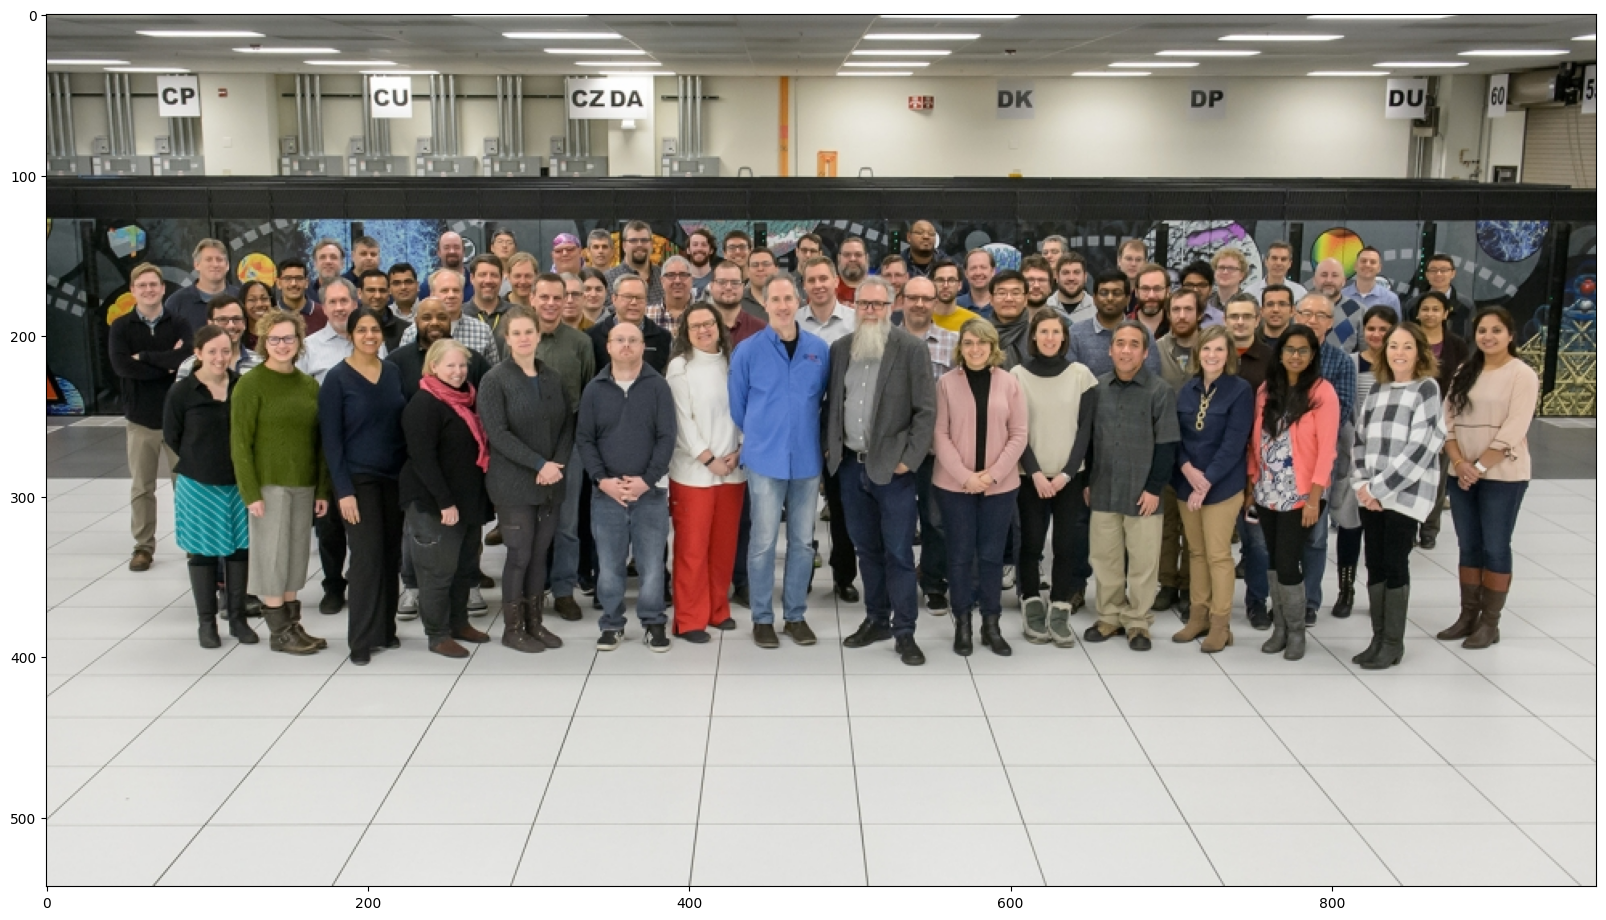

In [3]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(20,20))
plt.imshow(alcf_image)
plt.show()

## Convolutions

Convolutions are a restriction of - and a specialization of - dense linear layers.  A convolution of an image produces another image, and each output pixel is a function of only it's local neighborhood of points.  This is called an _inductive bias_ and is a big reason why convolutions work for image data: neighboring pixels are correlated and you can operate on just those pixels at a time.

See examples of convolutions [here](https://github.com/vdumoulin/conv_arithmetic)



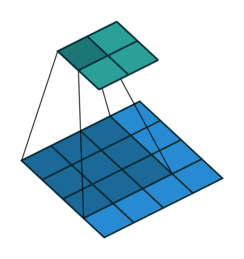


alcf_tensor shape torch.Size([3, 543, 965])
cpu
alcf_tensor shape torch.Size([1, 3, 543, 965])
conv_random shape torch.Size([3, 3, 15, 15])
alcf_rand shape torch.Size([1, 3, 529, 951])
alcf_rand shape torch.Size([3, 529, 951])


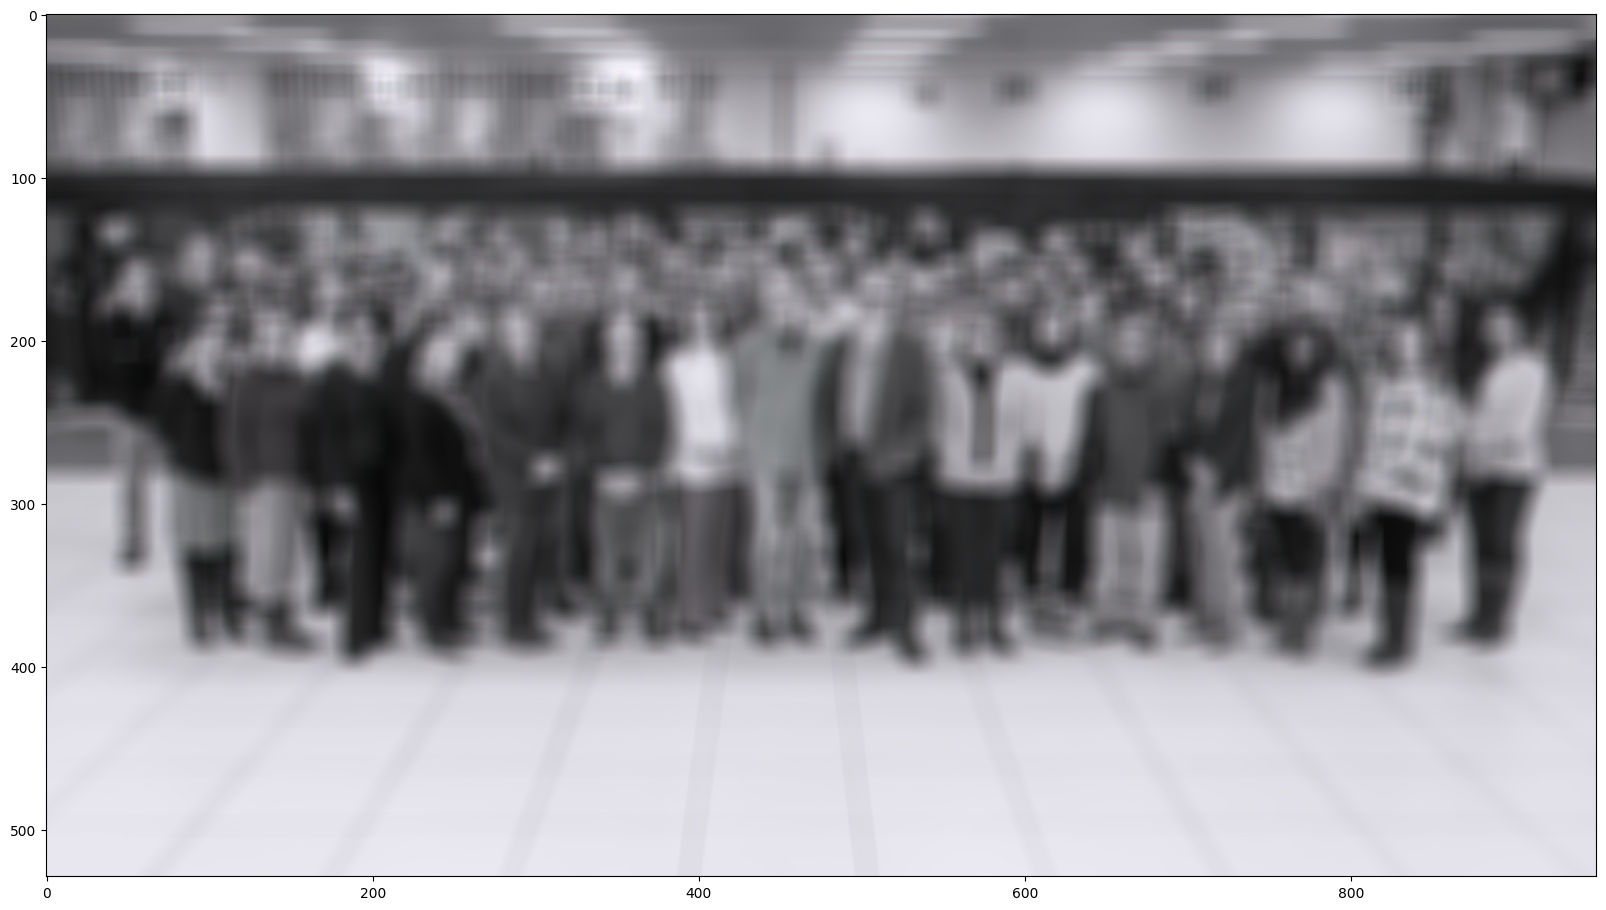

In [4]:
# Let's apply a convolution to the ALCF Staff photo:
alcf_tensor = torchvision.transforms.ToTensor()(alcf_image)
print("alcf_tensor shape", alcf_tensor.shape)
print(alcf_tensor.device)

# Reshape the tensor to have a batch size of 1:
alcf_tensor = alcf_tensor.reshape((1,) + alcf_tensor.shape)
print("alcf_tensor shape", alcf_tensor.shape)

# Create a random convolution:
# shape is: (channels_in, channels_out, kernel_x, kernel_y)
conv_random = torch.rand((3,3,15,15))
print("conv_random shape", conv_random.shape)

alcf_rand = torch.nn.functional.conv2d(alcf_tensor, conv_random)
alcf_rand = (1./alcf_rand.max()) * alcf_rand
print("alcf_rand shape", alcf_rand.shape)
alcf_rand = alcf_rand.reshape(alcf_rand.shape[1:])
print("alcf_rand shape", alcf_rand.shape)


rand_image = alcf_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)


## Normalization

![Batch Norm](batch_norm.png)
Reference: [Normalizations](https://arxiv.org/pdf/1903.10520.pdf)

Normalization is the act of transforming the mean and moment of your data to standard values (usually 0.0 and 1.0).  It's particularly useful in machine learning since it stabilizes training, and allows higher learning rates.

![Batch Normalization accelerates training](batch_norm_effect.png)

Reference: [Batch Norm](https://arxiv.org/pdf/1502.03167.pdf)


torch.Size([1, 3, 543, 965])


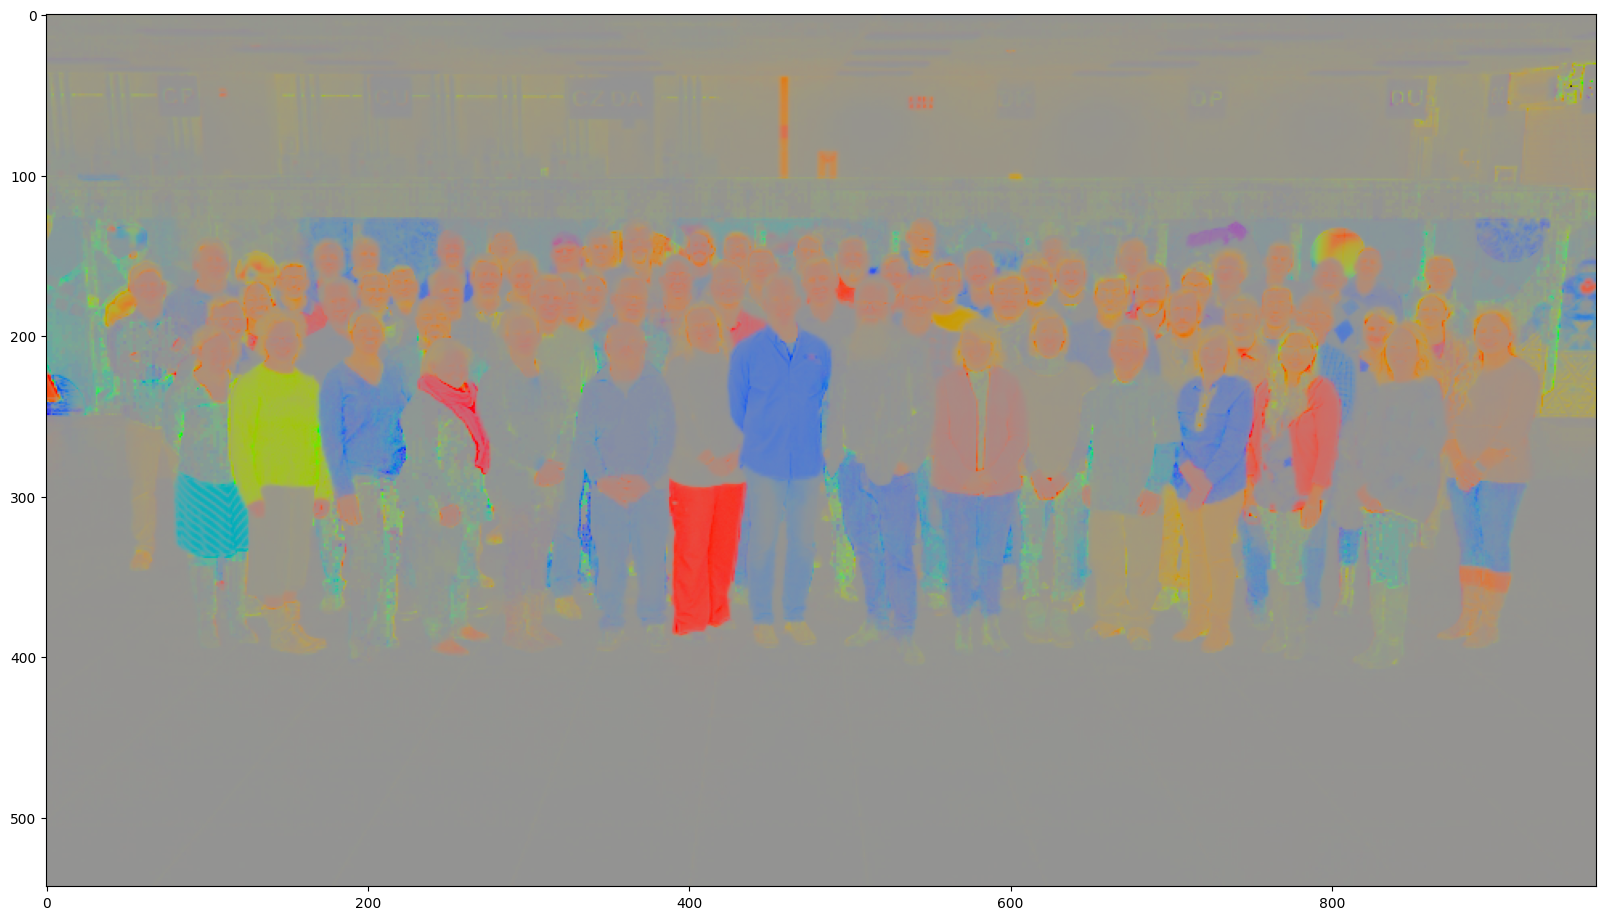

In [5]:
# Let's apply a normalization to the ALCF Staff photo:
alcf_tensor = torchvision.transforms.ToTensor()(alcf_image)

# Reshape the tensor to have a batch size of 1:
alcf_tensor = alcf_tensor.reshape((1,) + alcf_tensor.shape)


alcf_rand = torch.nn.functional.normalize(alcf_tensor)

alcf_rand = alcf_rand.reshape(alcf_rand.shape[1:])

print(alcf_tensor.shape)

rand_image = alcf_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)


In [6]:
print((torch.nn.functional.normalize(alcf_tensor) == torch.nn.functional.normalize(alcf_tensor, dim = 1)).all())
alcf_tensor
import numpy as np
image_array = np.array(alcf_image)

# Print the array
print(image_array)

tensor(True)
[[[186 184 169]
  [187 185 170]
  [188 186 173]
  ...
  [123 122 117]
  [126 125 120]
  [125 124 119]]

 [[140 138 126]
  [141 139 127]
  [142 140 128]
  ...
  [123 122 117]
  [122 121 116]
  [123 122 117]]

 [[112 111 106]
  [114 113 108]
  [117 116 111]
  ...
  [115 114 109]
  [115 114 109]
  [117 116 111]]

 ...

 [[227 227 225]
  [226 226 224]
  [227 227 225]
  ...
  [222 221 217]
  [222 221 217]
  [224 223 219]]

 [[227 227 225]
  [227 227 225]
  [227 227 225]
  ...
  [222 221 217]
  [223 222 218]
  [223 222 218]]

 [[228 228 226]
  [228 228 226]
  [227 227 225]
  ...
  [223 222 218]
  [222 221 217]
  [223 222 217]]]



## Downsampling (And upsampling)

Downsampling is a critical component of convolutional and many vision models.  Because of the local-only nature of convolutional filters, learning large-range features can be too slow for convergence.  Downsampling of layers can bring information from far away closer, effectively changing what it means to be "local" as the input to a convolution.

![Convolutional Pooling](conv_pooling.png "Pooling")

[Reference](https://www.researchgate.net/publication/333593451_Application_of_Transfer_Learning_Using_Convolutional_Neural_Network_Method_for_Early_Detection_of_Terry's_Nail)



torch.Size([1, 3, 543, 965])


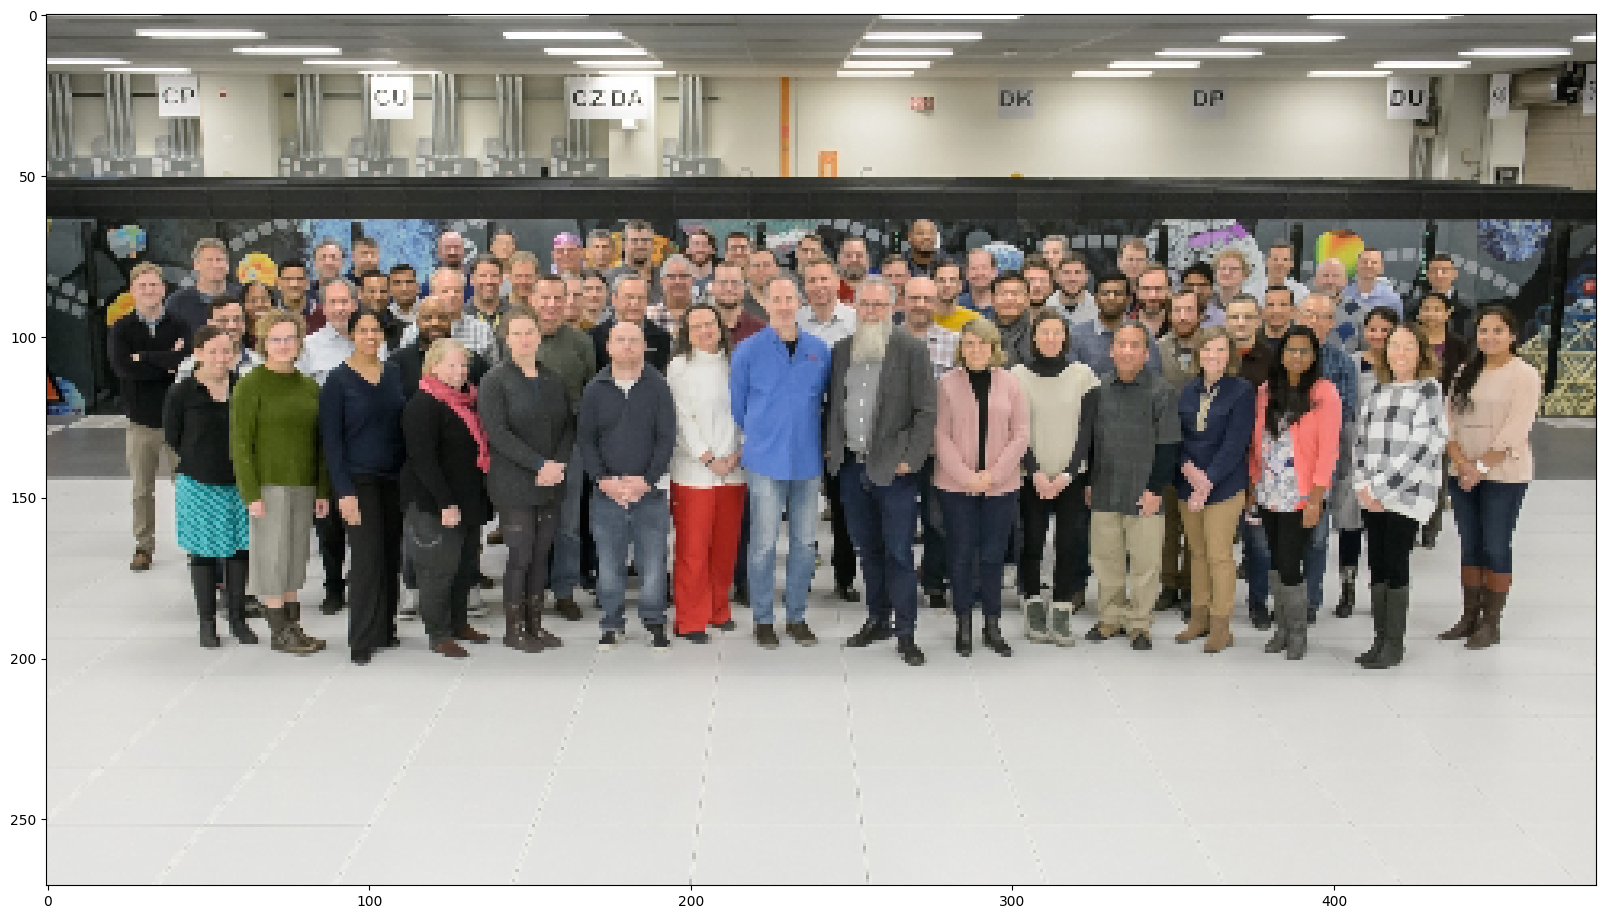

In [7]:
# Let's apply a normalization to the ALCF Staff photo:
alcf_tensor = torchvision.transforms.ToTensor()(alcf_image)

# Reshape the tensor to have a batch size of 1:
alcf_tensor = alcf_tensor.reshape((1,) + alcf_tensor.shape)


alcf_rand = torch.nn.functional.max_pool2d(alcf_tensor, 2)
alcf_rand = alcf_rand.reshape(alcf_rand.shape[1:])

print(alcf_tensor.shape)

rand_image = alcf_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)


## Residual Connections

One issue, quickly encountered when making convolutional networks deeper and deeper, is the "Vanishing Gradients" problem.  As layers were stacked on top of each other, the size of updates diminished at the earlier layers of a convolutional network.  The paper "Deep Residual Learning for Image Recognition" solved this by introduction "residual connections" as skip layers.


Reference: [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)

![Residual Layer](residual_layer.png)


Compare the performance of the models before and after the introduction of these layers:

![Resnet Performance vs. Plain network performance](resnet_comparison.png)

If you have time to read only one paper on computer vision, make it this one!  Resnet was the first model to beat human accuracy on ImageNet and is one of the most impactful papers in AI ever published.

# Building a ConvNet

In this section we'll build and apply a conv net to the mnist dataset.  The layers here are loosely based off of the ConvNext architecture.  Why?  Because we're getting into LLM's soon, and this ConvNet uses LLM features.  ConvNext is an update to the ResNet architecture that outperforms it.

[ConvNext](https://arxiv.org/abs/2201.03545)


The dataset here is CIFAR-10 - slightly harder than MNIST but still relatively easy and computationally tractable.

In [5]:
from torchvision import transforms as v2
import torch, torchvision

training_data = torchvision.datasets.CIFAR10(
    root="~/projects/learning/datasets",
    train=True,
    download=True,
    transform=v2.Compose([
        v2.ToTensor(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=32, scale=[0.85,1.0], antialias=False),
        v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    ])
)

test_data = torchvision.datasets.CIFAR10(
    root="~/projects/learning/datasets",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

training_data, validation_data = torch.utils.data.random_split(training_data, [0.8, 0.2], generator=torch.Generator().manual_seed(55))

batch_size = 128

# The dataloader makes our dataset iterable 
train_dataloader = torch.utils.data.DataLoader(training_data, 
    batch_size=batch_size, 
    pin_memory=True,
    shuffle=True, 
    num_workers=4)
val_dataloader = torch.utils.data.DataLoader(validation_data, 
    batch_size=batch_size, 
    pin_memory=True,
    shuffle=False, 
    num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
print("Number of training samples/images: ", len(training_data))
print("Number of validation samples/images: ", len(validation_data))

# how about the trai_dataloader? Print its characteristics
print("Number of training batches: ", len(train_dataloader))
print("Number of validation batches: ", len(val_dataloader))

Number of training samples/images:  40000
Number of validation samples/images:  10000
Number of training batches:  313
Number of validation batches:  79


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
batch, (X, Y) = next(enumerate(train_dataloader))
print("Batch", batch)
print("X shape", X.shape)
print("Y shape", Y.shape)



Batch 0
X shape torch.Size([128, 3, 32, 32])
Y shape torch.Size([128])


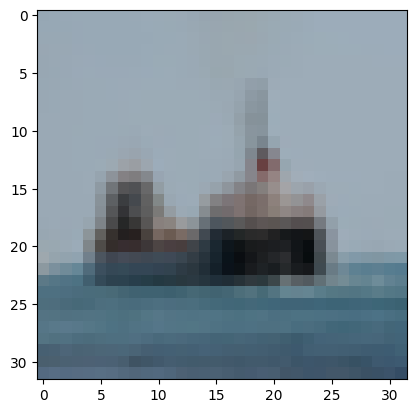

In [9]:
plt.imshow(X[127].cpu().permute((1,2,0))); plt.show()

This code below is important as our models get bigger: this is wrapping the pytorch data loaders to put the data onto the GPU!

cuda
torch.Size([128, 3, 32, 32]) torch.Size([128])
torch.Size([128, 3, 32, 32]) torch.Size([128])
cuda:0 cuda:0


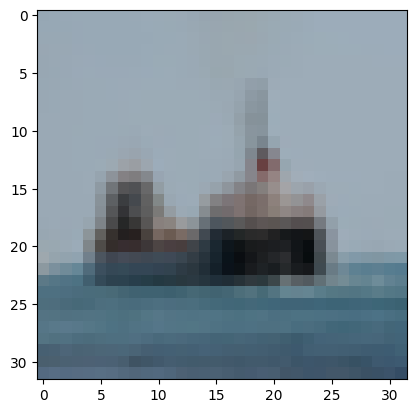

In [10]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(dev)

def preprocess(x, y):
    # CIFAR-10 is *color* images so 3 layers!
    return x.view(-1, 3, 32, 32).to(dev), y.to(dev)


print(X.shape, Y.shape)
x1, y1 = preprocess(X, Y)
print(x1.shape, y1.shape)
print(x1.device, y1.device)

plt.imshow(X[127].cpu().permute((1,2,0))); plt.show()



In [11]:
class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        for b in self.dl:
            yield (self.func(*b))



Batch 0
X shape torch.Size([128, 3, 32, 32])
Y shape torch.Size([128])


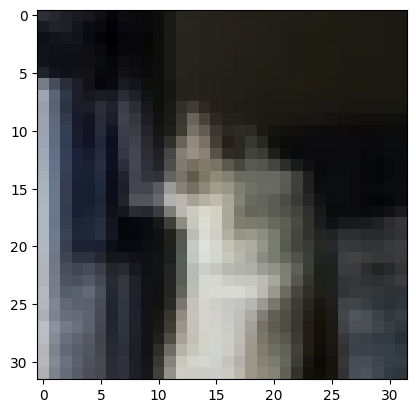

In [12]:
train_dataloader = WrappedDataLoader(train_dataloader, preprocess)
val_dataloader = WrappedDataLoader(val_dataloader, preprocess)

# check the characteristics of the updated dataloaders
batch, (X, Y) = next(enumerate(train_dataloader))
print("Batch", batch)
print("X shape", X.shape)
print("Y shape", Y.shape)
plt.imshow(X[127].cpu().permute((1,2,0))); plt.show()


In [50]:
from torch import nn


class Downsampler(nn.Module):
    def __init__(self, in_channels, out_channels, shape, stride=2):
        super(Downsampler, self).__init__()

        self.norm = nn.LayerNorm([in_channels, *shape])

        self.downsample = nn.Conv2d(
            in_channels=in_channels, 
            out_channels=out_channels,
            kernel_size = stride,
            stride = stride,
        )
    
    def forward(self, inputs):
        return self.downsample(self.norm(inputs))
        
        

class ConvNextBlock(nn.Module):
    def __init__(self, in_channels, shape):
        super(ConvNextBlock, self).__init__()
        # Depthwise, seperable convolution with a large number of output filters:
        self.conv1 = nn.Conv2d(in_channels=in_channels, 
                               out_channels=in_channels, 
                               groups=in_channels,
                               kernel_size=[7,7],
                               padding='same' )
        self.norm = nn.LayerNorm([in_channels, *shape])
        # Two more convolutions:
        self.conv2 = nn.Conv2d(in_channels=in_channels, 
                               out_channels=4*in_channels,
                               kernel_size=1)
        self.conv3 = nn.Conv2d(in_channels=4*in_channels,
                               out_channels=in_channels,
                               kernel_size=1)
    def forward(self, inputs):
        x = self.conv1(inputs)
        # The normalization layer:
        x = self.norm(x)
        x = self.conv2(x)
        # The non-linear activation layer:
        x = torch.nn.functional.gelu(x)
        x = self.conv3(x)
        # This makes it a residual network:
        return x + inputs
    

class Classifier(nn.Module):
    def __init__(self, n_initial_filters, n_stages, blocks_per_stage):
        super(Classifier, self).__init__()
        # This is a downsampling convolution that will produce patches of output.
        # This is similar to what vision transformers do to tokenize the images.
        self.stem = nn.Conv2d(in_channels=3,
                                    out_channels=n_initial_filters,
                                    kernel_size=1,
                                    stride=1)
        current_shape = [32, 32]
        self.norm1 = nn.LayerNorm([n_initial_filters,*current_shape])
        # self.norm1 = WrappedLayerNorm()
        current_n_filters = n_initial_filters
        self.layers = nn.Sequential()
        for i, n_blocks in enumerate(range(n_stages)):
            # Add a convnext block series:
            for _ in range(blocks_per_stage):
                self.layers.append(ConvNextBlock(in_channels=current_n_filters, shape=current_shape))
            # Add a downsampling layer:
            if i != n_stages - 1:
                # Skip downsampling if it's the last layer!
                self.layers.append(Downsampler(
                    in_channels=current_n_filters, 
                    out_channels=2*current_n_filters,
                    shape = current_shape,
                    )
                )
                # Double the number of filters:
                current_n_filters = 2*current_n_filters
                # Cut the shape in half:
                current_shape = [ cs // 2 for cs in current_shape]
        self.head = nn.Sequential(
            nn.Flatten(),
            nn.LayerNorm(current_n_filters),
            nn.Linear(current_n_filters, 10)
        )
        # self.norm2 = nn.InstanceNorm2d(current_n_filters)
        # # This brings it down to one channel / class
        # self.bottleneck = nn.Conv2d(in_channels=current_n_filters, out_channels=10, 
        #                                   kernel_size=1, stride=1)
    def forward(self, inputs):
        x = self.stem(inputs)
        # Apply a normalization after the initial patching:
        x = self.norm1(x)
        # Apply the main chunk of the network:
        x = self.layers(x)
        # Normalize and readout:
        x = nn.functional.avg_pool2d(x, x.shape[2:])
        x = self.head(x)
        return x



        # x = self.norm2(x)
        # x = self.bottleneck(x)

        # # Average pooling of the remaining spatial dimensions (and reshape) makes this label-like:
        # return nn.functional.avg_pool2d(x, kernel_size=x.shape[-2:]).reshape((-1,10))

In [14]:
model = Classifier(64, 4, 2)

model.cuda()

print(model)


Classifier(
  (stem): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
  (norm1): LayerNorm((64, 32, 32), eps=1e-05, elementwise_affine=True)
  (layers): Sequential(
    (0): ConvNextBlock(
      (conv1): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=same, groups=64)
      (norm): LayerNorm((64, 32, 32), eps=1e-05, elementwise_affine=True)
      (conv2): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (conv3): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): ConvNextBlock(
      (conv1): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=same, groups=64)
      (norm): LayerNorm((64, 32, 32), eps=1e-05, elementwise_affine=True)
      (conv2): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (conv3): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (2): Downsampler(
      (norm): LayerNorm((64, 32, 32), eps=1e-05, elementwise_affine=True)
      (downsample): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    )
    (3): 

In [15]:
from torchinfo import summary

print(summary(model, input_size=(batch_size, 3, 32, 32)))

Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 64, 32, 32]         256
├─LayerNorm: 1-2                         [128, 64, 32, 32]         131,072
├─Sequential: 1-3                        [128, 512, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 64, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 64, 32, 32]         3,200
│    │    └─LayerNorm: 3-2               [128, 64, 32, 32]         131,072
│    │    └─Conv2d: 3-3                  [128, 256, 32, 32]        16,640
│    │    └─Conv2d: 3-4                  [128, 64, 32, 32]         16,448
│    └─ConvNextBlock: 2-2                [128, 64, 32, 32]         --
│    │    └─Conv2d: 3-5                  [128, 64, 32, 32]         3,200
│    │    └─LayerNorm: 3-6               [128, 64, 32, 32]         131,072
│    │    └─Conv2d: 3-7                  [128, 256, 32,

In [16]:
def evaluate(dataloader, model, loss_fn, val_bar):
    # Set the model to evaluation mode - some NN pieces behave differently during training
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader)
    num_batches = len(dataloader)
    loss, correct = 0, 0

    # We can save computation and memory by not calculating gradients here - we aren't optimizing 
    with torch.no_grad():
        # loop over all of the batches
        for X, y in dataloader:
            pred = model(X)
            loss += loss_fn(pred, y).item()
            # how many are correct in this batch? Tracking for accuracy 
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            val_bar.update()
            
    loss /= num_batches
    correct /= (size*batch_size)
    
    accuracy = 100*correct
    return accuracy, loss

In [17]:
def train_one_epoch(dataloader, model, loss_fn, optimizer, progress_bar):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # forward pass
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # backward pass calculates gradients
        loss.backward()
        
        # take one step with these gradients
        optimizer.step()
        
        # resets the gradients 
        optimizer.zero_grad()      

        progress_bar.update()

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

## Actually train and evaluate the model:

Train Epoch 0:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.759, accuracy: 35.903


Validate Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.749, accuracy: 35.987


Train Epoch 1:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 1:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: training loss: 1.434, accuracy: 48.532


Validate Epoch 1:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.445, accuracy: 47.755


Train Epoch 2:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 2:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2: training loss: 1.265, accuracy: 54.845


Validate Epoch 2:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.294, accuracy: 53.521


Train Epoch 3:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 3:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3: training loss: 1.085, accuracy: 61.192


Validate Epoch 3:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 1.151, accuracy: 57.981


Train Epoch 4:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 4:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4: training loss: 1.003, accuracy: 64.774


Validate Epoch 4:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 1.103, accuracy: 60.413


Train Epoch 5:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 0.866, accuracy: 69.561


Validate Epoch 5:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 1.012, accuracy: 63.578


Train Epoch 6:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 6:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6: training loss: 0.778, accuracy: 72.489


Validate Epoch 6:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 0.964, accuracy: 65.447


Train Epoch 7:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 7:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7: training loss: 0.704, accuracy: 74.968


Validate Epoch 7:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 0.924, accuracy: 67.672


Train Epoch 8:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 8:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 8: training loss: 0.563, accuracy: 80.292


Validate Epoch 8:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 0.856, accuracy: 70.589


Train Epoch 9:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 9:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 9: training loss: 0.519, accuracy: 81.764


Validate Epoch 9:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 0.864, accuracy: 70.471


Train Epoch 10:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 0.414, accuracy: 85.883


Validate Epoch 10:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 0.820, accuracy: 71.944


Train Epoch 11:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 11:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 11: training loss: 0.339, accuracy: 88.446


Validate Epoch 11:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 0.780, accuracy: 73.734


Train Epoch 12:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 12:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 12: training loss: 0.323, accuracy: 88.863


Validate Epoch 12:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 0.838, accuracy: 72.725


Train Epoch 13:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 13:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 13: training loss: 0.263, accuracy: 90.952


Validate Epoch 13:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 0.799, accuracy: 74.120


Train Epoch 14:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 14:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 14: training loss: 0.253, accuracy: 91.177


Validate Epoch 14:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 0.842, accuracy: 73.121


Train Epoch 15:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 0.224, accuracy: 92.417


Validate Epoch 15:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 0.842, accuracy: 74.426


Train Epoch 16:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 16:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 16: training loss: 0.191, accuracy: 93.326


Validate Epoch 16:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 0.879, accuracy: 74.565


Train Epoch 17:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 17:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 17: training loss: 0.177, accuracy: 93.815


Validate Epoch 17:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 0.886, accuracy: 75.010


Train Epoch 18:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 18:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 18: training loss: 0.179, accuracy: 93.718


Validate Epoch 18:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 0.894, accuracy: 74.921


Train Epoch 19:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 19:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 19: training loss: 0.164, accuracy: 94.199


Validate Epoch 19:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 0.930, accuracy: 74.525


Train Epoch 20:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 0.149, accuracy: 94.751


Validate Epoch 20:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 0.933, accuracy: 74.684


Train Epoch 21:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 21:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 21: training loss: 0.154, accuracy: 94.496


Validate Epoch 21:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 0.991, accuracy: 74.911


Train Epoch 22:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 22:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 22: training loss: 0.120, accuracy: 95.747


Validate Epoch 22:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 0.904, accuracy: 75.682


Train Epoch 23:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 23:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 23: training loss: 0.112, accuracy: 96.071


Validate Epoch 23:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 0.941, accuracy: 76.137


Train Epoch 24:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 24:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 24: training loss: 0.147, accuracy: 94.758


Validate Epoch 24:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 0.999, accuracy: 74.792


Train Epoch 25:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 0.112, accuracy: 96.026


Validate Epoch 25:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 0.957, accuracy: 75.524


Train Epoch 26:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 26:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 26: training loss: 0.129, accuracy: 95.512


Validate Epoch 26:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 0.970, accuracy: 75.020


Train Epoch 27:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 27:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 27: training loss: 0.102, accuracy: 96.378


Validate Epoch 27:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 0.944, accuracy: 76.147


Train Epoch 28:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 28:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 28: training loss: 0.127, accuracy: 95.532


Validate Epoch 28:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 1.019, accuracy: 75.297


Train Epoch 29:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 29:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 29: training loss: 0.087, accuracy: 96.907


Validate Epoch 29:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 0.946, accuracy: 76.830


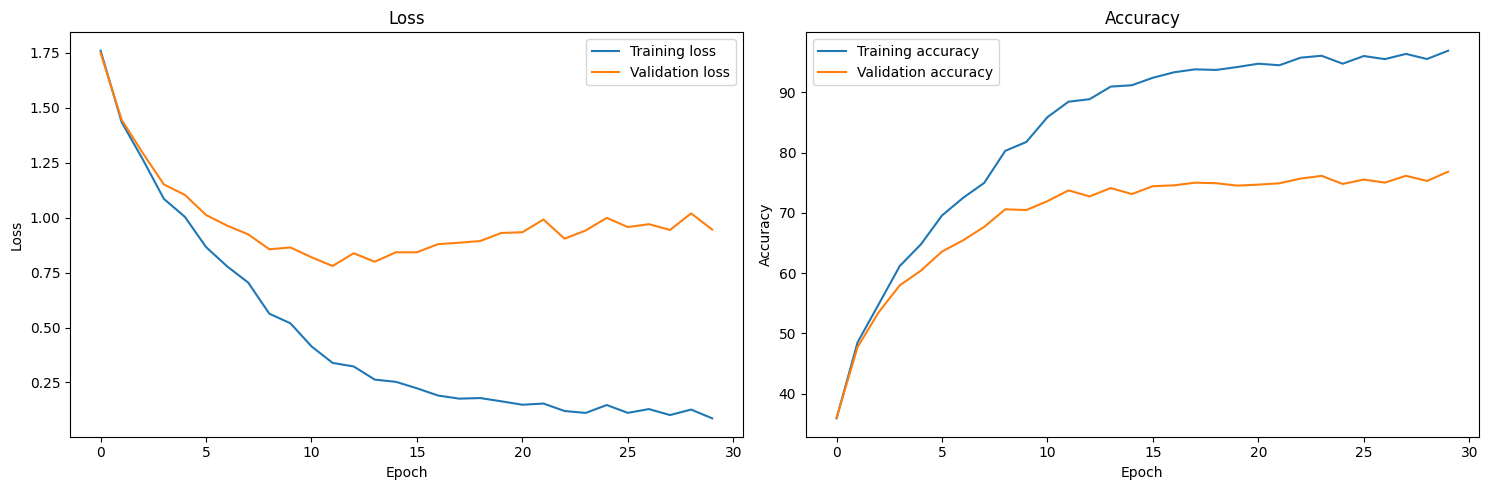

In [22]:
from tqdm.notebook import tqdm
from matplotlib import pyplot as   plt

train_loss = []
train_acc = []
val_loss = []
val_acc = []

epochs = 30
for j in range(epochs):
    with tqdm(total=len(train_dataloader), position=0, leave=True, desc=f"Train Epoch {j}") as train_bar:
        train_one_epoch(train_dataloader, model, loss_fn, optimizer, train_bar)
    
    # checking on the training loss and accuracy once per epoch
        
    with tqdm(total=len(train_dataloader), position=0, leave=True, desc=f"Validate (train) Epoch {j}") as train_eval:
        acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
        print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
        train_loss.append(loss)
        train_acc.append(acc)
        

    with tqdm(total=len(val_dataloader), position=0, leave=True, desc=f"Validate Epoch {j}") as val_bar:
        acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
        print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
        val_loss.append(loss_val)
        val_acc.append(acc_val)


fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(train_loss, label="Training loss")
ax[0].plot(val_loss, label="Validation loss")
ax[0].set_title("Loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].plot(train_acc, label="Training accuracy")
ax[1].plot(val_acc, label="Validation accuracy")
ax[1].set_title("Accuracy")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()
    

In [24]:
import os
models_dir = "~/models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
torch.save(model.state_dict(), os.path.join(models_dir, "baseline.pth"))

# Homework 1:

In this notebook, we've learned about some basic convolutional networks and trained one on CIFAR-10 images.  It did ... OK.  There is significant overfitting of this model.  There are some ways to address that, but we didn't have time to get into that in this session.

Meanwhile, your homework (part 1) for this week is to try to train the model again but with a different architecture.  Change one or more of the following:
- The number of convolutions between downsampling
- The number of filters in each layer
- The initial "patchify" layer
- Another hyper-parameter of your choosing


And compare your final validation accuracy to the accuracy shown here.  Can you beat the validation accuracy shown?

For full credit on the homework, you need to show (via text, or make a plot) the training and validation data sets' performance (loss and accuracy) for all the epochs you train.  You also need to explain, in several sentences, what you changed in the network and why you think it makes a difference.

## solution

### Models' definitions


In [1]:
#model = Classifier(64, 4, 2)
#model.cuda
models = []
model_names = []

from torchinfo import summary

#### playing with: _The number of convolutions between downsampling_


In [2]:
models

[]

In [3]:
model_names

[]

In [19]:
model1 = Classifier(64, 4, 1); model1.cuda(); model_names.append("M1: less blocks_per_stage")
model2 = Classifier(64, 4, 4); model2.cuda(); model_names.append("M2: more blocks_per_stage")

print(summary(model1, input_size=(batch_size, 3, 32, 32)))
print(summary(model2, input_size=(batch_size, 3, 32, 32)))

models.extend([model1, model2])

Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 64, 32, 32]         256
├─LayerNorm: 1-2                         [128, 64, 32, 32]         131,072
├─Sequential: 1-3                        [128, 512, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 64, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 64, 32, 32]         3,200
│    │    └─LayerNorm: 3-2               [128, 64, 32, 32]         131,072
│    │    └─Conv2d: 3-3                  [128, 256, 32, 32]        16,640
│    │    └─Conv2d: 3-4                  [128, 64, 32, 32]         16,448
│    └─Downsampler: 2-2                  [128, 128, 16, 16]        --
│    │    └─LayerNorm: 3-5               [128, 64, 32, 32]         131,072
│    │    └─Conv2d: 3-6                  [128, 128, 16, 16]        32,896
│    └─ConvNextBlock: 2-3                [128, 128, 16

#### playing with: _The number of filters in each layer_


In [20]:
## checking model architecture
model3 = Classifier(32, 4, 2); model3.cuda(); model_names.append("M3: less initial filters")
print(summary(model3, input_size=(batch_size, 3, 32, 32)))


model4 = Classifier(128, 4, 2); model4.cuda(); model_names.append("M4: more initial filters")
print(summary(model4, input_size=(batch_size, 3, 32, 32)))

models.extend([model3, model4])

Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 32, 32]         128
├─LayerNorm: 1-2                         [128, 32, 32, 32]         65,536
├─Sequential: 1-3                        [128, 256, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-2               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-3                  [128, 128, 32, 32]        4,224
│    │    └─Conv2d: 3-4                  [128, 32, 32, 32]         4,128
│    └─ConvNextBlock: 2-2                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-5                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-6               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-7                  [128, 128, 32, 32] 

#### playing with: _The initial "patchify" layer_

In [53]:
class Downsampler(nn.Module):
    def __init__(self, in_channels, out_channels, shape, stride=2):
        super(Downsampler, self).__init__()

        self.norm = nn.BatchNorm2d(in_channels)

        self.downsample = nn.Conv2d(
            in_channels=in_channels, 
            out_channels=out_channels,
            kernel_size = stride,
            stride = stride,
        )
    
    def forward(self, inputs):
        return self.downsample(self.norm(inputs))
        
        

class ConvNextBlock(nn.Module):
    def __init__(self, in_channels, shape):
        super(ConvNextBlock, self).__init__()
        # Depthwise, seperable convolution with a large number of output filters:
        self.conv1 = nn.Conv2d(in_channels=in_channels, 
                               out_channels=in_channels, 
                               groups=in_channels,
                               kernel_size=[7,7],
                               padding='same' )
        self.norm = nn.BatchNorm2d(in_channels)
        # Two more convolutions:
        self.conv2 = nn.Conv2d(in_channels=in_channels, 
                               out_channels=4*in_channels,
                               kernel_size=1)
        self.conv3 = nn.Conv2d(in_channels=4*in_channels,
                               out_channels=in_channels,
                               kernel_size=1)
    def forward(self, inputs):
        x = self.conv1(inputs)
        # The normalization layer:
        x = self.norm(x)
        x = self.conv2(x)
        # The non-linear activation layer:
        x = torch.nn.functional.gelu(x)
        x = self.conv3(x)
        # This makes it a residual network:
        return x + inputs


class Classifier_patched(nn.Module):
    def __init__(self, n_initial_filters, n_stages, blocks_per_stage,patch_kernel_size, patch_stride):
        super(Classifier_patched, self).__init__()
        # This is a downsampling convolution that will produce patches of output.
        # This is similar to what vision transformers do to tokenize the images.
        self.stem = nn.Conv2d(in_channels=3,
                                    out_channels=n_initial_filters,
                                    kernel_size=patch_kernel_size,
                                    stride=patch_stride)
        current_shape = [32, 32]
        self.norm1 = nn.BatchNorm2d(n_initial_filters)
        # self.norm1 = WrappedLayerNorm()
        current_n_filters = n_initial_filters
        self.layers = nn.Sequential()
        for i, n_blocks in enumerate(range(n_stages)):
            # Add a convnext block series:
            for _ in range(blocks_per_stage):
                self.layers.append(ConvNextBlock(in_channels=current_n_filters, shape=current_shape))
            # Add a downsampling layer:
            if i != n_stages - 1:
                # Skip downsampling if it's the last layer!
                self.layers.append(Downsampler(
                    in_channels=current_n_filters, 
                    out_channels=2*current_n_filters,
                    shape = current_shape,
                    )
                )
                # Double the number of filters:
                current_n_filters = 2*current_n_filters
                # Cut the shape in half:
                current_shape = [ cs // 2 for cs in current_shape]
        self.head = nn.Sequential(
            nn.Flatten(),
            nn.LayerNorm(current_n_filters),
            nn.Linear(current_n_filters, 10)
        )
        # self.norm2 = nn.InstanceNorm2d(current_n_filters)
        # # This brings it down to one channel / class
        # self.bottleneck = nn.Conv2d(in_channels=current_n_filters, out_channels=10, 
        #                                   kernel_size=1, stride=1)
    def forward(self, inputs):
        x = self.stem(inputs)
        # Apply a normalization after the initial patching:
        x = self.norm1(x)
        # Apply the main chunk of the network:
        x = self.layers(x)
        # Normalize and readout:
        x = nn.functional.avg_pool2d(x, x.shape[2:])
        x = self.head(x)
        return x

# Baseline model
# model = Classifier(64, 4, 2, 1, 1)
# model.cuda()
    


In [22]:
model5 = Classifier_patched(64, 4, 2, 2, 2); model5.cuda(); model_names.append("M5: larger patch")
model6 = Classifier_patched(64, 4, 2, 4, 2); model6.cuda(); model_names.append("M6: unsymetric patch")

models.extend([model5, model6])

In [23]:
len(models)

6

In [24]:
model_names

['M1: less blocks_per_stage',
 'M2: more blocks_per_stage',
 'M3: less initial filters',
 'M4: more initial filters',
 'M5: larger patch',
 'M6: unsymetric patch']

### Loss, training and validation functions

These remain the same:  `train_one_epoch`, `evaluate`, `loss_fn`


### Optimizers

Need one for each model:

In [25]:
optimizer1 = torch.optim.AdamW(model1.parameters(), lr=0.001, weight_decay=0.01)

In [26]:
optimizer2 = torch.optim.AdamW(model2.parameters(), lr=0.001, weight_decay=0.01)

In [27]:
optimizer3 = torch.optim.AdamW(model3.parameters(), lr=0.001, weight_decay=0.01)

In [28]:
optimizer4 = torch.optim.AdamW(model4.parameters(), lr=0.001, weight_decay=0.01)

In [29]:
optimizer5 = torch.optim.AdamW(model5.parameters(), lr=0.001, weight_decay=0.01)

In [30]:
optimizer6 = torch.optim.AdamW(model6.parameters(), lr=0.001, weight_decay=0.01)

In [30]:
optimizer1

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

### Data loaders

We only need to define the `test_dataloader`. The `train_dataloader` and `val_dataloader` were already defined above

Number of test samples/images:  10000
Number of test batches:  79
Batch 0
X shape torch.Size([128, 3, 32, 32])
Y shape torch.Size([128])


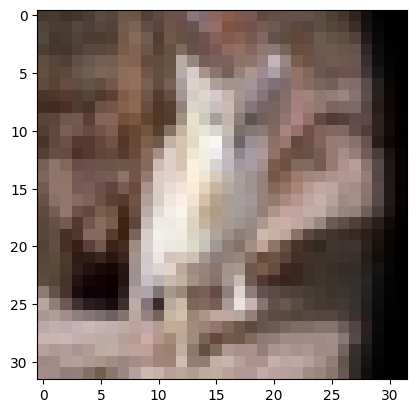

In [57]:
test_dataloader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_size,
                                              pin_memory=True,
                                              shuffle=False,
                                              num_workers=4)

print("Number of test samples/images: ", len(test_data))
print("Number of test batches: ", len(test_dataloader))

# move the data to the device
test_dataloader = WrappedDataLoader(test_dataloader, preprocess)

# check the characteristics of the updated dataloaders
batch, (X, Y) = next(enumerate(test_dataloader))    
print("Batch", batch)
print("X shape", X.shape)
print("Y shape", Y.shape)
plt.imshow(X[127].cpu().permute((1,2,0))); plt.show()

## Training the model(s)
Simply, the same code idea as before. I'm only adding loops to go through the different models:

In [33]:
import os
models_dir = "~/models"

print(len(models), len(model_names), model_names)

from tqdm.notebook import tqdm


# Initialize lists to store loss and accuracy for each model
train_loss = [[], [], [], [], [], []]
train_acc = [[], [], [], [], [], []]
val_loss = [[], [], [], [], [], []]
val_acc = [[], [], [], [], [], []]


epochs = 30



6 6 ['M1: less blocks_per_stage', 'M2: more blocks_per_stage', 'M3: less initial filters', 'M4: more initial filters', 'M5: larger patch', 'M6: unsymetric patch']


In [33]:

for j in range(epochs):
    #for i, model in enumerate(models[1:]):
        i = 0; model = model1
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Train Epoch {j} {model_names[i]}") as train_bar:
            train_one_epoch(train_dataloader, model, loss_fn, optimizer1, train_bar)

        # evaluate on training data
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Validate (train) Epoch {j} {model_names[i]}") as train_eval:
            acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
            print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
            train_loss[i].append(loss)
            train_acc[i].append(acc)

        # evaluate on validation data
        with tqdm(total=len(val_dataloader), position=0, leave=False, desc=f"Validate Epoch {j} {model_names[i]}") as val_bar:
            acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
            print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
            val_loss[i].append(loss_val)
            val_acc[i].append(acc_val)
            
torch.save(model1.state_dict(), os.path.join(models_dir, "m1.pth"))
print("Model ", i+1, " : ", model_names[i], " is now trained and saved")

Train Epoch 0 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.633, accuracy: 41.416


Validate Epoch 0 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.621, accuracy: 41.307


Train Epoch 1 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 1 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: training loss: 1.385, accuracy: 50.542


Validate Epoch 1 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.397, accuracy: 49.268


Train Epoch 2 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 2 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2: training loss: 1.231, accuracy: 55.926


Validate Epoch 2 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.251, accuracy: 54.964


Train Epoch 3 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 3 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3: training loss: 1.112, accuracy: 61.062


Validate Epoch 3 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 1.159, accuracy: 58.505


Train Epoch 4 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 4 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4: training loss: 1.014, accuracy: 64.389


Validate Epoch 4 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 1.101, accuracy: 60.394


Train Epoch 5 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 0.873, accuracy: 69.227


Validate Epoch 5 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 0.993, accuracy: 64.517


Train Epoch 6 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 6 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6: training loss: 0.812, accuracy: 71.538


Validate Epoch 6 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 0.967, accuracy: 65.674


Train Epoch 7 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 7 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7: training loss: 0.722, accuracy: 75.052


Validate Epoch 7 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 0.915, accuracy: 67.682


Train Epoch 8 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 8 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 8: training loss: 0.643, accuracy: 77.451


Validate Epoch 8 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 0.888, accuracy: 68.790


Train Epoch 9 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 9 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 9: training loss: 0.569, accuracy: 79.877


Validate Epoch 9 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 0.840, accuracy: 69.769


Train Epoch 10 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 0.475, accuracy: 83.669


Validate Epoch 10 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 0.814, accuracy: 71.648


Train Epoch 11 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 11 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 11: training loss: 0.429, accuracy: 85.164


Validate Epoch 11 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 0.804, accuracy: 72.290


Train Epoch 12 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 12 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 12: training loss: 0.387, accuracy: 86.913


Validate Epoch 12 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 0.814, accuracy: 72.300


Train Epoch 13 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 13 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 13: training loss: 0.324, accuracy: 88.788


Validate Epoch 13 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 0.817, accuracy: 73.507


Train Epoch 14 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 14 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 14: training loss: 0.330, accuracy: 88.656


Validate Epoch 14 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 0.852, accuracy: 73.002


Train Epoch 15 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 0.266, accuracy: 90.987


Validate Epoch 15 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 0.862, accuracy: 73.190


Train Epoch 16 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 16 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 16: training loss: 0.233, accuracy: 91.985


Validate Epoch 16 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 0.859, accuracy: 73.823


Train Epoch 17 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 17 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 17: training loss: 0.200, accuracy: 93.318


Validate Epoch 17 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 0.846, accuracy: 74.426


Train Epoch 18 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 18 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 18: training loss: 0.192, accuracy: 93.440


Validate Epoch 18 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 0.890, accuracy: 73.972


Train Epoch 19 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 19 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 19: training loss: 0.188, accuracy: 93.266


Validate Epoch 19 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 0.892, accuracy: 74.684


Train Epoch 20 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 0.170, accuracy: 94.129


Validate Epoch 20 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 0.902, accuracy: 74.258


Train Epoch 21 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 21 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 21: training loss: 0.162, accuracy: 94.177


Validate Epoch 21 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 0.907, accuracy: 74.713


Train Epoch 22 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 22 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 22: training loss: 0.159, accuracy: 94.521


Validate Epoch 22 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 0.928, accuracy: 74.585


Train Epoch 23 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 23 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 23: training loss: 0.158, accuracy: 94.461


Validate Epoch 23 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 0.942, accuracy: 74.248


Train Epoch 24 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 24 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 24: training loss: 0.132, accuracy: 95.250


Validate Epoch 24 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 0.970, accuracy: 75.267


Train Epoch 25 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 0.131, accuracy: 95.375


Validate Epoch 25 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 0.938, accuracy: 75.653


Train Epoch 26 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 26 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 26: training loss: 0.121, accuracy: 95.742


Validate Epoch 26 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 0.956, accuracy: 75.831


Train Epoch 27 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 27 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 27: training loss: 0.118, accuracy: 95.739


Validate Epoch 27 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 0.998, accuracy: 75.227


Train Epoch 28 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 28 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 28: training loss: 0.122, accuracy: 95.694


Validate Epoch 28 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 0.991, accuracy: 74.862


Train Epoch 29 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 29 M1: less blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 29: training loss: 0.125, accuracy: 95.545


Validate Epoch 29 M1: less blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 0.995, accuracy: 75.020
Model  1  :  M1: less blocks_per_stage  is now trained and saved


In [34]:
for j in range(epochs):
    #for i, model in enumerate(models[1:]):
        i = 1; model = model2
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Train Epoch {j} {model_names[i]}") as train_bar:
            train_one_epoch(train_dataloader, model, loss_fn, optimizer2, train_bar)

        # evaluate on training data
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Validate (train) Epoch {j} {model_names[i]}") as train_eval:
            acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
            print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
            train_loss[i].append(loss)
            train_acc[i].append(acc)

        # evaluate on validation data
        with tqdm(total=len(val_dataloader), position=0, leave=False, desc=f"Validate Epoch {j} {model_names[i]}") as val_bar:
            acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
            print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
            val_loss[i].append(loss_val)
            val_acc[i].append(acc_val)
            
torch.save(model2.state_dict(), os.path.join(models_dir, "m2.pth"))           
print("Model ", i+1, " : ", model_names[i], " is now trained and saved")

Train Epoch 0 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.958, accuracy: 26.762


Validate Epoch 0 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.946, accuracy: 27.245


Train Epoch 1 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 1 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: training loss: 1.683, accuracy: 38.294


Validate Epoch 1 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.677, accuracy: 38.024


Train Epoch 2 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 2 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2: training loss: 1.461, accuracy: 46.658


Validate Epoch 2 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.470, accuracy: 45.936


Train Epoch 3 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 3 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3: training loss: 1.343, accuracy: 51.390


Validate Epoch 3 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 1.350, accuracy: 50.455


Train Epoch 4 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 4 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4: training loss: 1.287, accuracy: 53.654


Validate Epoch 4 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 1.318, accuracy: 51.098


Train Epoch 5 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 1.062, accuracy: 62.111


Validate Epoch 5 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 1.132, accuracy: 58.960


Train Epoch 6 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 6 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6: training loss: 0.966, accuracy: 65.550


Validate Epoch 6 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 1.059, accuracy: 61.472


Train Epoch 7 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 7 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7: training loss: 0.812, accuracy: 71.558


Validate Epoch 7 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 0.952, accuracy: 65.912


Train Epoch 8 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 8 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 8: training loss: 0.732, accuracy: 74.244


Validate Epoch 8 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 0.906, accuracy: 67.049


Train Epoch 9 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 9 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 9: training loss: 0.611, accuracy: 78.859


Validate Epoch 9 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 0.844, accuracy: 70.174


Train Epoch 10 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 0.546, accuracy: 80.851


Validate Epoch 10 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 0.824, accuracy: 71.034


Train Epoch 11 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 11 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 11: training loss: 0.445, accuracy: 84.477


Validate Epoch 11 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 0.816, accuracy: 72.399


Train Epoch 12 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 12 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 12: training loss: 0.364, accuracy: 87.575


Validate Epoch 12 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 0.783, accuracy: 73.645


Train Epoch 13 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 13 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 13: training loss: 0.321, accuracy: 88.875


Validate Epoch 13 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 0.777, accuracy: 73.991


Train Epoch 14 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 14 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 14: training loss: 0.249, accuracy: 91.546


Validate Epoch 14 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 0.797, accuracy: 74.871


Train Epoch 15 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 0.228, accuracy: 92.080


Validate Epoch 15 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 0.851, accuracy: 74.565


Train Epoch 16 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 16 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 16: training loss: 0.212, accuracy: 92.629


Validate Epoch 16 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 0.846, accuracy: 74.753


Train Epoch 17 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 17 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 17: training loss: 0.182, accuracy: 93.787


Validate Epoch 17 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 0.816, accuracy: 75.000


Train Epoch 18 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 18 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 18: training loss: 0.168, accuracy: 94.282


Validate Epoch 18 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 0.903, accuracy: 75.079


Train Epoch 19 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 19 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 19: training loss: 0.173, accuracy: 93.902


Validate Epoch 19 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 0.942, accuracy: 73.714


Train Epoch 20 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 0.146, accuracy: 94.866


Validate Epoch 20 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 0.918, accuracy: 75.346


Train Epoch 21 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 21 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 21: training loss: 0.176, accuracy: 93.802


Validate Epoch 21 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 0.912, accuracy: 74.120


Train Epoch 22 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 22 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 22: training loss: 0.109, accuracy: 96.249


Validate Epoch 22 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 0.865, accuracy: 77.304


Train Epoch 23 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 23 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 23: training loss: 0.107, accuracy: 96.196


Validate Epoch 23 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 0.921, accuracy: 76.088


Train Epoch 24 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 24 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 24: training loss: 0.118, accuracy: 95.752


Validate Epoch 24 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 0.927, accuracy: 75.613


Train Epoch 25 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 0.106, accuracy: 96.109


Validate Epoch 25 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 0.927, accuracy: 75.514


Train Epoch 26 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 26 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 26: training loss: 0.102, accuracy: 96.373


Validate Epoch 26 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 0.878, accuracy: 76.770


Train Epoch 27 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 27 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 27: training loss: 0.092, accuracy: 96.750


Validate Epoch 27 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 0.916, accuracy: 76.187


Train Epoch 28 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 28 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 28: training loss: 0.091, accuracy: 96.708


Validate Epoch 28 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 0.927, accuracy: 76.384


Train Epoch 29 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 29 M2: more blocks_per_stage:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 29: training loss: 0.094, accuracy: 96.533


Validate Epoch 29 M2: more blocks_per_stage:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 1.003, accuracy: 76.592
Model  2  :  M2: more blocks_per_stage  is now trained and saved


In [35]:
for j in range(epochs):
    #for i, model in enumerate(models[1:]):
        i = 2; model = model3
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Train Epoch {j} {model_names[i]}") as train_bar:
            train_one_epoch(train_dataloader, model, loss_fn, optimizer3, train_bar)

        # evaluate on training data
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Validate (train) Epoch {j} {model_names[i]}") as train_eval:
            acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
            print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
            train_loss[i].append(loss)
            train_acc[i].append(acc)

        # evaluate on validation data
        with tqdm(total=len(val_dataloader), position=0, leave=False, desc=f"Validate Epoch {j} {model_names[i]}") as val_bar:
            acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
            print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
            val_loss[i].append(loss_val)
            val_acc[i].append(acc_val)
            
torch.save(model3.state_dict(), os.path.join(models_dir, "m3.pth"))   
print("Model ", i+1, " : ", model_names[i], " is now trained and saved")

Train Epoch 0 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.515, accuracy: 45.587


Validate Epoch 0 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.507, accuracy: 45.886


Train Epoch 1 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 1 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: training loss: 1.281, accuracy: 54.328


Validate Epoch 1 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.298, accuracy: 52.937


Train Epoch 2 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 2 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2: training loss: 1.106, accuracy: 60.650


Validate Epoch 2 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.158, accuracy: 58.169


Train Epoch 3 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 3 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3: training loss: 0.953, accuracy: 66.696


Validate Epoch 3 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 1.031, accuracy: 63.212


Train Epoch 4 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 4 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4: training loss: 0.791, accuracy: 72.317


Validate Epoch 4 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 0.918, accuracy: 67.029


Train Epoch 5 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 0.724, accuracy: 74.828


Validate Epoch 5 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 0.867, accuracy: 69.294


Train Epoch 6 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 6 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6: training loss: 0.612, accuracy: 78.904


Validate Epoch 6 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 0.786, accuracy: 71.984


Train Epoch 7 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 7 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7: training loss: 0.567, accuracy: 79.730


Validate Epoch 7 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 0.784, accuracy: 72.221


Train Epoch 8 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 8 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 8: training loss: 0.475, accuracy: 83.591


Validate Epoch 8 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 0.735, accuracy: 74.288


Train Epoch 9 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 9 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 9: training loss: 0.435, accuracy: 84.672


Validate Epoch 9 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 0.756, accuracy: 73.912


Train Epoch 10 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 0.398, accuracy: 86.299


Validate Epoch 10 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 0.738, accuracy: 75.138


Train Epoch 11 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 11 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 11: training loss: 0.324, accuracy: 88.940


Validate Epoch 11 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 0.713, accuracy: 76.098


Train Epoch 12 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 12 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 12: training loss: 0.310, accuracy: 89.200


Validate Epoch 12 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 0.737, accuracy: 75.643


Train Epoch 13 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 13 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 13: training loss: 0.291, accuracy: 89.786


Validate Epoch 13 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 0.755, accuracy: 75.564


Train Epoch 14 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 14 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 14: training loss: 0.284, accuracy: 89.776


Validate Epoch 14 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 0.804, accuracy: 75.356


Train Epoch 15 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 0.213, accuracy: 92.674


Validate Epoch 15 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 0.712, accuracy: 77.739


Train Epoch 16 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 16 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 16: training loss: 0.192, accuracy: 93.361


Validate Epoch 16 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 0.752, accuracy: 76.355


Train Epoch 17 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 17 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 17: training loss: 0.192, accuracy: 93.101


Validate Epoch 17 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 0.782, accuracy: 76.642


Train Epoch 18 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 18 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 18: training loss: 0.177, accuracy: 93.772


Validate Epoch 18 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 0.807, accuracy: 76.572


Train Epoch 19 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 19 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 19: training loss: 0.179, accuracy: 93.583


Validate Epoch 19 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 0.815, accuracy: 76.315


Train Epoch 20 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 0.159, accuracy: 94.307


Validate Epoch 20 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 0.798, accuracy: 76.978


Train Epoch 21 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 21 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 21: training loss: 0.149, accuracy: 94.713


Validate Epoch 21 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 0.807, accuracy: 77.215


Train Epoch 22 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 22 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 22: training loss: 0.167, accuracy: 94.187


Validate Epoch 22 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 0.895, accuracy: 76.355


Train Epoch 23 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 23 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 23: training loss: 0.120, accuracy: 95.897


Validate Epoch 23 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 0.780, accuracy: 77.848


Train Epoch 24 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 24 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 24: training loss: 0.126, accuracy: 95.485


Validate Epoch 24 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 0.807, accuracy: 78.362


Train Epoch 25 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 0.126, accuracy: 95.505


Validate Epoch 25 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 0.867, accuracy: 77.660


Train Epoch 26 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 26 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 26: training loss: 0.110, accuracy: 96.204


Validate Epoch 26 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 0.814, accuracy: 78.234


Train Epoch 27 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 27 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 27: training loss: 0.104, accuracy: 96.303


Validate Epoch 27 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 0.823, accuracy: 78.886


Train Epoch 28 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 28 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 28: training loss: 0.125, accuracy: 95.475


Validate Epoch 28 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 0.854, accuracy: 77.690


Train Epoch 29 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 29 M3: less initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 29: training loss: 0.103, accuracy: 96.338


Validate Epoch 29 M3: less initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 0.869, accuracy: 78.056
Model  3  :  M3: less initial filters  is now trained and saved


In [36]:
for j in range(epochs):
    #for i, model in enumerate(models[1:]):
        i = 3; model = model4
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Train Epoch {j} {model_names[i]}") as train_bar:
            train_one_epoch(train_dataloader, model, loss_fn, optimizer4, train_bar)

        # evaluate on training data
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Validate (train) Epoch {j} {model_names[i]}") as train_eval:
            acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
            print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
            train_loss[i].append(loss)
            train_acc[i].append(acc)

        # evaluate on validation data
        with tqdm(total=len(val_dataloader), position=0, leave=False, desc=f"Validate Epoch {j} {model_names[i]}") as val_bar:
            acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
            print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
            val_loss[i].append(loss_val)
            val_acc[i].append(acc_val)
            
torch.save(model4.state_dict(), os.path.join(models_dir, "m4.pth"))      
print("Model ", i+1, " : ", model_names[i], " is now trained and saved")

Train Epoch 0 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.761, accuracy: 34.929


Validate Epoch 0 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.759, accuracy: 34.642


Train Epoch 1 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 1 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: training loss: 1.509, accuracy: 45.130


Validate Epoch 1 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.507, accuracy: 44.709


Train Epoch 2 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 2 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2: training loss: 1.417, accuracy: 48.522


Validate Epoch 2 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.430, accuracy: 47.666


Train Epoch 3 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 3 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3: training loss: 1.215, accuracy: 56.270


Validate Epoch 3 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 1.254, accuracy: 54.074


Train Epoch 4 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 4 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4: training loss: 1.095, accuracy: 60.765


Validate Epoch 4 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 1.151, accuracy: 58.505


Train Epoch 5 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 0.977, accuracy: 65.623


Validate Epoch 5 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 1.068, accuracy: 61.867


Train Epoch 6 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 6 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6: training loss: 0.893, accuracy: 68.488


Validate Epoch 6 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 0.995, accuracy: 64.438


Train Epoch 7 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 7 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7: training loss: 0.811, accuracy: 71.775


Validate Epoch 7 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 0.956, accuracy: 66.644


Train Epoch 8 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 8 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 8: training loss: 0.673, accuracy: 76.408


Validate Epoch 8 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 0.850, accuracy: 69.235


Train Epoch 9 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 9 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 9: training loss: 0.572, accuracy: 80.022


Validate Epoch 9 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 0.795, accuracy: 71.657


Train Epoch 10 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 0.526, accuracy: 81.699


Validate Epoch 10 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 0.802, accuracy: 72.043


Train Epoch 11 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 11 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 11: training loss: 0.433, accuracy: 85.051


Validate Epoch 11 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 0.739, accuracy: 74.476


Train Epoch 12 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 12 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 12: training loss: 0.386, accuracy: 86.534


Validate Epoch 12 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 0.743, accuracy: 74.604


Train Epoch 13 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 13 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 13: training loss: 0.332, accuracy: 88.453


Validate Epoch 13 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 0.766, accuracy: 74.792


Train Epoch 14 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 14 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 14: training loss: 0.273, accuracy: 90.692


Validate Epoch 14 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 0.738, accuracy: 75.722


Train Epoch 15 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 0.280, accuracy: 90.163


Validate Epoch 15 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 0.782, accuracy: 75.475


Train Epoch 16 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 16 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 16: training loss: 0.217, accuracy: 92.547


Validate Epoch 16 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 0.758, accuracy: 76.048


Train Epoch 17 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 17 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 17: training loss: 0.226, accuracy: 92.185


Validate Epoch 17 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 0.767, accuracy: 76.256


Train Epoch 18 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 18 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 18: training loss: 0.169, accuracy: 94.097


Validate Epoch 18 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 0.792, accuracy: 76.810


Train Epoch 19 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 19 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 19: training loss: 0.145, accuracy: 94.816


Validate Epoch 19 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 0.786, accuracy: 77.027


Train Epoch 20 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 0.149, accuracy: 94.589


Validate Epoch 20 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 0.850, accuracy: 77.255


Train Epoch 21 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 21 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 21: training loss: 0.151, accuracy: 94.661


Validate Epoch 21 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 0.863, accuracy: 76.335


Train Epoch 22 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 22 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 22: training loss: 0.136, accuracy: 95.153


Validate Epoch 22 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 0.865, accuracy: 77.097


Train Epoch 23 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 23 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 23: training loss: 0.127, accuracy: 95.567


Validate Epoch 23 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 0.848, accuracy: 77.156


Train Epoch 24 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 24 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 24: training loss: 0.143, accuracy: 95.013


Validate Epoch 24 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 0.906, accuracy: 77.186


Train Epoch 25 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 0.133, accuracy: 95.352


Validate Epoch 25 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 0.913, accuracy: 76.760


Train Epoch 26 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 26 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 26: training loss: 0.106, accuracy: 96.134


Validate Epoch 26 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 0.860, accuracy: 77.917


Train Epoch 27 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 27 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 27: training loss: 0.084, accuracy: 96.997


Validate Epoch 27 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 0.861, accuracy: 78.293


Train Epoch 28 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 28 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 28: training loss: 0.079, accuracy: 97.100


Validate Epoch 28 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 0.802, accuracy: 79.193


Train Epoch 29 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 29 M4: more initial filters:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 29: training loss: 0.088, accuracy: 96.848


Validate Epoch 29 M4: more initial filters:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 0.831, accuracy: 79.351
Model  4  :  M4: more initial filters  is now trained and saved


In [34]:

for j in range(epochs):
    #for i, model in enumerate(models[1:]):
        i = 4; model = model5
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Train Epoch {j} {model_names[i]}") as train_bar:
            train_one_epoch(train_dataloader, model, loss_fn, optimizer5, train_bar)

        # evaluate on training data
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Validate (train) Epoch {j} {model_names[i]}") as train_eval:
            acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
            print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
            train_loss[i].append(loss)
            train_acc[i].append(acc)

        # evaluate on validation data
        with tqdm(total=len(val_dataloader), position=0, leave=False, desc=f"Validate Epoch {j} {model_names[i]}") as val_bar:
            acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
            print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
            val_loss[i].append(loss_val)
            val_acc[i].append(acc_val)
            
torch.save(model5.state_dict(), os.path.join(models_dir, "m5.pth"))           
print("Model ", i+1, " : ", model_names[i], " is now trained and saved")


Train Epoch 0 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.360, accuracy: 51.295


Validate Epoch 0 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.383, accuracy: 50.346


Train Epoch 1 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 1 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: training loss: 1.125, accuracy: 59.702


Validate Epoch 1 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.154, accuracy: 58.534


Train Epoch 2 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 2 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2: training loss: 0.964, accuracy: 66.082


Validate Epoch 2 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.019, accuracy: 63.390


Train Epoch 3 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 3 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3: training loss: 0.851, accuracy: 70.030


Validate Epoch 3 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 0.918, accuracy: 67.306


Train Epoch 4 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 4 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4: training loss: 0.773, accuracy: 73.078


Validate Epoch 4 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 0.869, accuracy: 69.106


Train Epoch 5 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 0.623, accuracy: 78.145


Validate Epoch 5 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 0.747, accuracy: 73.576


Train Epoch 6 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 6 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6: training loss: 0.574, accuracy: 80.117


Validate Epoch 6 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 0.740, accuracy: 73.764


Train Epoch 7 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 7 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7: training loss: 0.479, accuracy: 83.272


Validate Epoch 7 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 0.672, accuracy: 75.979


Train Epoch 8 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 8 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 8: training loss: 0.472, accuracy: 83.531


Validate Epoch 8 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 0.695, accuracy: 75.485


Train Epoch 9 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 9 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 9: training loss: 0.411, accuracy: 85.673


Validate Epoch 9 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 0.677, accuracy: 76.721


Train Epoch 10 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 0.359, accuracy: 87.240


Validate Epoch 10 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 0.650, accuracy: 77.631


Train Epoch 11 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 11 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 11: training loss: 0.326, accuracy: 88.561


Validate Epoch 11 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 0.657, accuracy: 77.502


Train Epoch 12 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 12 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 12: training loss: 0.292, accuracy: 89.916


Validate Epoch 12 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 0.641, accuracy: 78.234


Train Epoch 13 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 13 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 13: training loss: 0.261, accuracy: 90.890


Validate Epoch 13 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 0.650, accuracy: 78.580


Train Epoch 14 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 14 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 14: training loss: 0.231, accuracy: 92.173


Validate Epoch 14 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 0.646, accuracy: 78.649


Train Epoch 15 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 0.221, accuracy: 92.220


Validate Epoch 15 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 0.690, accuracy: 78.293


Train Epoch 16 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 16 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 16: training loss: 0.205, accuracy: 92.961


Validate Epoch 16 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 0.675, accuracy: 78.382


Train Epoch 17 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 17 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 17: training loss: 0.187, accuracy: 93.406


Validate Epoch 17 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 0.700, accuracy: 78.600


Train Epoch 18 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 18 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 18: training loss: 0.172, accuracy: 93.987


Validate Epoch 18 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 0.681, accuracy: 79.470


Train Epoch 19 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 19 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 19: training loss: 0.158, accuracy: 94.369


Validate Epoch 19 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 0.716, accuracy: 78.946


Train Epoch 20 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 0.177, accuracy: 93.710


Validate Epoch 20 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 0.743, accuracy: 77.868


Train Epoch 21 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 21 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 21: training loss: 0.138, accuracy: 95.213


Validate Epoch 21 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 0.703, accuracy: 79.678


Train Epoch 22 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 22 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 22: training loss: 0.145, accuracy: 94.893


Validate Epoch 22 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 0.755, accuracy: 79.371


Train Epoch 23 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 23 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 23: training loss: 0.124, accuracy: 95.590


Validate Epoch 23 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 0.723, accuracy: 80.370


Train Epoch 24 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 24 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 24: training loss: 0.112, accuracy: 96.106


Validate Epoch 24 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 0.733, accuracy: 79.895


Train Epoch 25 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 0.126, accuracy: 95.505


Validate Epoch 25 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 0.757, accuracy: 79.450


Train Epoch 26 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 26 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 26: training loss: 0.124, accuracy: 95.610


Validate Epoch 26 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 0.760, accuracy: 78.916


Train Epoch 27 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 27 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 27: training loss: 0.114, accuracy: 95.999


Validate Epoch 27 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 0.749, accuracy: 79.984


Train Epoch 28 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 28 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 28: training loss: 0.099, accuracy: 96.501


Validate Epoch 28 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 0.747, accuracy: 79.866


Train Epoch 29 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 29 M5: larger patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 29: training loss: 0.096, accuracy: 96.608


Validate Epoch 29 M5: larger patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 0.786, accuracy: 79.233
Model  5  :  M5: larger patch  is now trained and saved


In [44]:

for j in range(epochs):
    #for i, model in enumerate(models[1:]):
        i = 5; model = model6
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Train Epoch {j} {model_names[i]}") as train_bar:
            train_one_epoch(train_dataloader, model, loss_fn, optimizer6, train_bar)

        # evaluate on training data
        with tqdm(total=len(train_dataloader), position=0, leave=False, desc=f"Validate (train) Epoch {j} {model_names[i]}") as train_eval:
            acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
            print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
            train_loss[i].append(loss)
            train_acc[i].append(acc)

        # evaluate on validation data
        with tqdm(total=len(val_dataloader), position=0, leave=False, desc=f"Validate Epoch {j} {model_names[i]}") as val_bar:
            acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
            print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
            val_loss[i].append(loss_val)
            val_acc[i].append(acc_val)
            
torch.save(model6.state_dict(), os.path.join(models_dir, "m6.pth"))      
print("Model ", i+1, " : ", model_names[i], " is now trained and saved")


Train Epoch 0 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.421, accuracy: 48.847


Validate Epoch 0 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.447, accuracy: 47.498


Train Epoch 1 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 1 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: training loss: 1.284, accuracy: 54.618


Validate Epoch 1 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.299, accuracy: 53.639


Train Epoch 2 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 2 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2: training loss: 1.010, accuracy: 64.295


Validate Epoch 2 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.056, accuracy: 61.887


Train Epoch 3 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 3 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3: training loss: 0.872, accuracy: 69.484


Validate Epoch 3 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 0.941, accuracy: 66.515


Train Epoch 4 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 4 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4: training loss: 0.726, accuracy: 74.558


Validate Epoch 4 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 0.816, accuracy: 70.698


Train Epoch 5 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 0.700, accuracy: 75.342


Validate Epoch 5 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 0.822, accuracy: 70.491


Train Epoch 6 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 6 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6: training loss: 0.635, accuracy: 77.843


Validate Epoch 6 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 0.784, accuracy: 72.627


Train Epoch 7 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 7 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7: training loss: 0.584, accuracy: 79.405


Validate Epoch 7 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 0.765, accuracy: 73.072


Train Epoch 8 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 8 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 8: training loss: 0.483, accuracy: 83.077


Validate Epoch 8 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 0.693, accuracy: 75.633


Train Epoch 9 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 9 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 9: training loss: 0.470, accuracy: 83.671


Validate Epoch 9 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 0.705, accuracy: 75.198


Train Epoch 10 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 0.428, accuracy: 85.229


Validate Epoch 10 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 0.683, accuracy: 76.473


Train Epoch 11 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 11 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 11: training loss: 0.378, accuracy: 86.913


Validate Epoch 11 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 0.673, accuracy: 76.839


Train Epoch 12 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 12 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 12: training loss: 0.356, accuracy: 87.510


Validate Epoch 12 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 0.694, accuracy: 76.513


Train Epoch 13 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 13 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 13: training loss: 0.304, accuracy: 89.444


Validate Epoch 13 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 0.659, accuracy: 77.700


Train Epoch 14 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 14 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 14: training loss: 0.283, accuracy: 90.171


Validate Epoch 14 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 0.671, accuracy: 77.621


Train Epoch 15 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 0.271, accuracy: 90.360


Validate Epoch 15 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 0.700, accuracy: 77.284


Train Epoch 16 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 16 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 16: training loss: 0.245, accuracy: 91.531


Validate Epoch 16 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 0.691, accuracy: 77.255


Train Epoch 17 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 17 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 17: training loss: 0.219, accuracy: 92.507


Validate Epoch 17 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 0.707, accuracy: 78.105


Train Epoch 18 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 18 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 18: training loss: 0.231, accuracy: 91.988


Validate Epoch 18 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 0.739, accuracy: 77.087


Train Epoch 19 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 19 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 19: training loss: 0.192, accuracy: 93.221


Validate Epoch 19 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 0.731, accuracy: 78.174


Train Epoch 20 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 0.187, accuracy: 93.448


Validate Epoch 20 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 0.759, accuracy: 78.085


Train Epoch 21 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 21 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 21: training loss: 0.170, accuracy: 93.992


Validate Epoch 21 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 0.759, accuracy: 78.402


Train Epoch 22 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 22 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 22: training loss: 0.174, accuracy: 93.985


Validate Epoch 22 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 0.753, accuracy: 78.165


Train Epoch 23 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 23 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 23: training loss: 0.156, accuracy: 94.491


Validate Epoch 23 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 0.812, accuracy: 77.769


Train Epoch 24 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 24 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 24: training loss: 0.142, accuracy: 94.838


Validate Epoch 24 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 0.769, accuracy: 78.530


Train Epoch 25 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 0.142, accuracy: 94.853


Validate Epoch 25 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 0.794, accuracy: 78.501


Train Epoch 26 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 26 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 26: training loss: 0.128, accuracy: 95.425


Validate Epoch 26 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 0.800, accuracy: 78.501


Train Epoch 27 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 27 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 27: training loss: 0.134, accuracy: 95.200


Validate Epoch 27 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 0.810, accuracy: 78.085


Train Epoch 28 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 28 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 28: training loss: 0.120, accuracy: 95.749


Validate Epoch 28 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 0.791, accuracy: 78.540


Train Epoch 29 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 29 M6: unsymetric patch:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 29: training loss: 0.114, accuracy: 95.879


Validate Epoch 29 M6: unsymetric patch:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 0.836, accuracy: 78.392
Model  6  :  M6: unsymetric patch  is now trained and saved


## Training and validation data performance

For the first 4 models (changes to blocks_per_stage and n_initial_filters)

In [37]:
from matplotlib import pyplot as   plt

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15,10))

colors = ['blue', 'red', 'green', 'purple']
for i, model_name in enumerate(model_names):
    ax[0].plot(train_loss[i], color=colors[i], label=f"Training loss {model_name}")
    ax[0].plot(val_loss[i], color=colors[i], linestyle='dashed', label=f"Validation loss {model_name}")
    ax[1].plot(train_acc[i], color=colors[i], label=f"Training accuracy {model_name}")
    ax[1].plot(val_acc[i], color=colors[i], linestyle='dashed', label=f"Validation accuracy {model_name}")

ax[0].set_title("Loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].set_title("Accuracy")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

These plots suggest the model behave very similar to each other. Hard to conclude one of these models is better/worst than baseline. Also, it is clear that number of epochs is enough, so unlikely to get better results from longer training.

For the last 2 models (changes to patch size)

In [38]:
model_names[4:5]

['M5: larger patch']

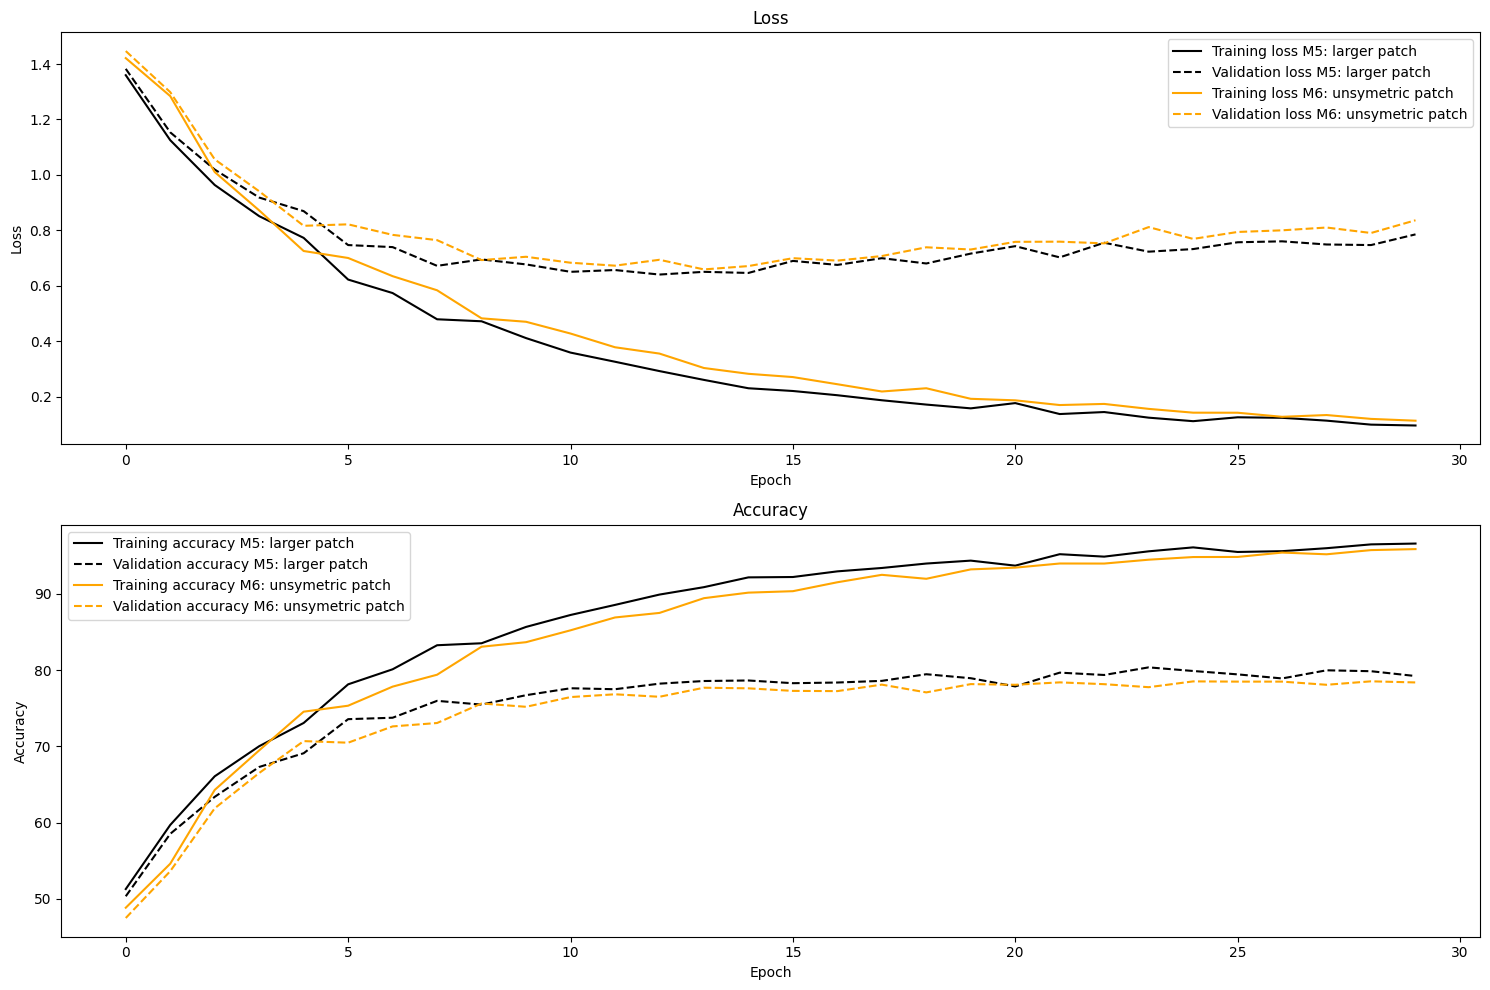

In [45]:
from matplotlib import pyplot as   plt

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(15,10))

colors = ['black', 'orange']
for i, model_name in enumerate(model_names[4:]):
    ax[0].plot(train_loss[i+4], color=colors[i], label=f"Training loss {model_name}")
    ax[0].plot(val_loss[i+4], color=colors[i], linestyle='dashed', label=f"Validation loss {model_name}")
    ax[1].plot(train_acc[i+4], color=colors[i], label=f"Training accuracy {model_name}")
    ax[1].plot(val_acc[i+4], color=colors[i], linestyle='dashed', label=f"Validation accuracy {model_name}")

ax[0].set_title("Loss")
ax[0].legend()
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].set_title("Accuracy")
ax[1].legend()
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

## Generalization: Performance on test dataset

In [46]:
model_names

['M1: less blocks_per_stage',
 'M2: more blocks_per_stage',
 'M3: less initial filters',
 'M4: more initial filters',
 'M5: larger patch',
 'M6: unsymetric patch']

In [51]:
# Load the models- likely needed since polaris sessions are 1 hour only
# Remember to also load the definitions of these model classes first!
import os
models_dir = "~/models"
model = Classifier(64, 4, 2)

model.load_state_dict(torch.load(os.path.join(models_dir, "baseline.pth"), map_location = torch.device('cuda')))
model.cuda()
print("model is now loaded")

model_names.insert(0, "Baseline")

model is now loaded


In [52]:
model1 = Classifier(64, 4, 1)
model1.load_state_dict(torch.load(os.path.join(models_dir, "m1.pth"), map_location = torch.device('cuda')))
model1.cuda()

model2 = Classifier(64, 4, 4)
model2.load_state_dict(torch.load(os.path.join(models_dir, "m2.pth"), map_location = torch.device('cuda')))
model2.cuda()


model3 = Classifier(32, 4, 2) 
model3.load_state_dict(torch.load(os.path.join(models_dir, "m3.pth"), map_location = torch.device('cuda')))
model3.cuda() 

model4 = Classifier(128, 4, 2)
model4.load_state_dict(torch.load(os.path.join(models_dir, "m4.pth"), map_location = torch.device('cuda'))) 
model4.cuda()


print("models 1-4 now loaded")

models 1-4 now loaded


In [54]:

model5 = Classifier_patched(64, 4, 2, 2, 2)
model5.load_state_dict(torch.load(os.path.join(models_dir, "m5.pth"), map_location = torch.device('cuda')))
model5.cuda()

model6 = Classifier_patched(64, 4, 2, 4, 2)
model6.load_state_dict(torch.load(os.path.join(models_dir, "m6.pth"), map_location = torch.device('cuda'))) 
model6.cuda()


print("all models are now loaded")

all models are now loaded


The evaluate() function need to be changed (no need for a progress bar here)

In [55]:
def evaluate(dataloader, model, loss_fn):
    # Set the model to evaluation mode - some NN pieces behave differently during training
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader)
    num_batches = len(dataloader)
    loss, correct = 0, 0

    # We can save computation and memory by not calculating gradients here - we aren't optimizing 
    with torch.no_grad():
        # loop over all of the batches
        for X, y in dataloader:
            pred = model(X)
            loss += loss_fn(pred, y).item()
            # how many are correct in this batch? Tracking for accuracy 
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    loss /= num_batches
    correct /= (size*batch_size)
    
    accuracy = 100*correct
    return accuracy, loss

In [62]:
### Checking on test data
# Evaluate the models
test_acc, test_loss = evaluate(test_dataloader, model, loss_fn)
test_acc1, test_loss1 = evaluate(test_dataloader, model1, loss_fn)
test_acc2, test_loss2 = evaluate(test_dataloader, model2, loss_fn)
test_acc3, test_loss3 = evaluate(test_dataloader, model3, loss_fn)
test_acc4, test_loss4 = evaluate(test_dataloader, model4, loss_fn)
test_acc5, test_loss5 = evaluate(test_dataloader, model5, loss_fn)
test_acc6, test_loss6 = evaluate(test_dataloader, model6, loss_fn)

In [61]:
accuracy

[77.29430379746836,
 75.13844936708861,
 77.02729430379746,
 78.24367088607595,
 78.51068037974683]

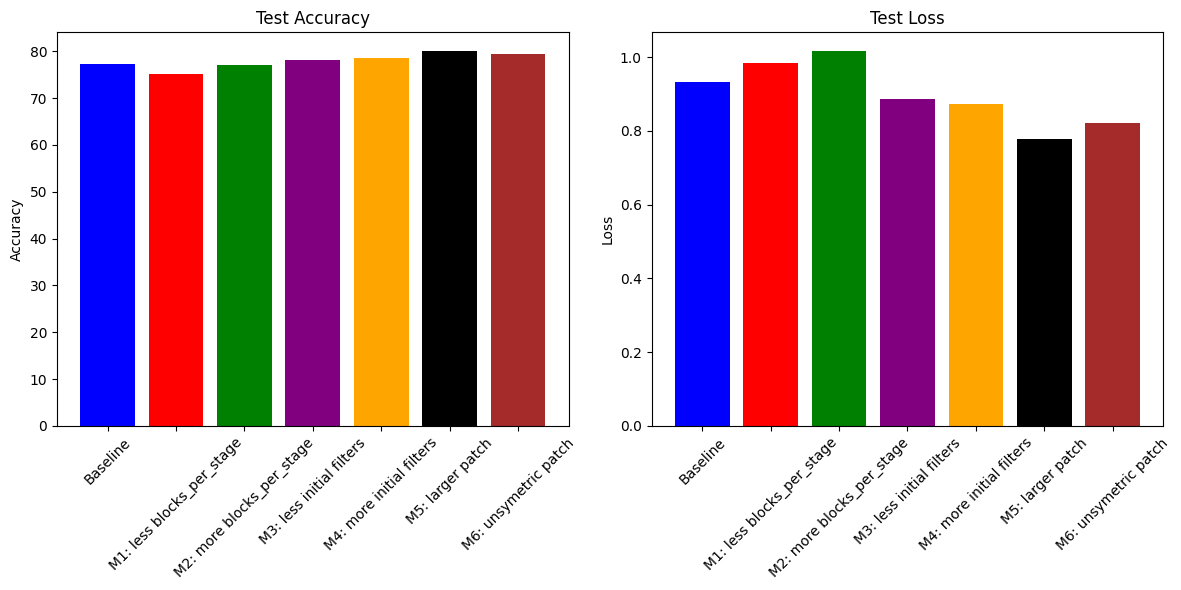

In [63]:
accuracy = [test_acc, test_acc1, test_acc2, test_acc3, test_acc4, test_acc5, test_acc6]
loss = [test_loss, test_loss1, test_loss2, test_loss3, test_loss4, test_loss5, test_loss6]



# Create a figure with 2 subplots: one for accuracy, one for loss
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['blue', 'red', 'green', 'purple', 'orange', 'black', 'brown']


# Accuracy bar plot
axs[0].bar(model_names, accuracy, color=colors)
axs[0].set_title('Test Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].xaxis.set_ticks(model_names)
axs[0].set_xticklabels(model_names, rotation=45)  # Rotate x-axis labels


# Loss bar plot
axs[1].bar(model_names, loss, color=colors)
axs[1].set_title('Test Loss')
axs[1].set_ylabel('Loss')
axs[1].xaxis.set_ticks(model_names)
axs[1].set_xticklabels(model_names, rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

Based on these plots, best results (more generalization/ less overfitting) are with M5; where a larger patch size (kernel_size = 2 and stride = 2) is used in the initial 'patchify' layer. The accuracy is slightly better than the rest, and the loss is smaller. In this case, the network knows less details about the images; which enables it to better generalize.
I have not tested with a larger patch size, but perhaps tuning this parameter further gives more perforamance improvements.

Worth noting that changing patch size necessiated changing the model's internals as well. Namely, changing the normalization to be Batch normalization (instead of layer normalization). It is possible that normalization change is the reason for better perforamnce, but I have not tested with an identical patch size to verify.

So in conclusion, either the larger patch size, or the normalization type change has resulted in the perfromance improvement.